In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
pd.set_option('max_rows', 5)
pd.set_option('max_columns', 9)
%matplotlib inline

## 決定係数 ($R^{2}$, coefficient of determination)
---
回帰モデルのあてはまりの良さを表す指標の 1 つ。説明変数と目的変数の重相関係数 $R$ を用いて $R^{2}$ で表すことが多い。  
重相関係数とは、 3 以上の変数があるときの、 1 つの変数と他の全ての変数 (の線型結合) との相関係数。つまり、 $y$ と $\hat{y}$ の相関係数。

決定係数 $
\displaystyle \eta ^{2} =1-\frac
    {\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\hat{y}_{i}\right)^{2}}
    {\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)^{2}}
$

**最小二乗法を用いた場合**、上で定義した**決定係数と重相関係数の二乗は一致**する。 (単回帰分析の場合は相関係数)

###### 証明

$
\begin{align}
    R^{2} & =S^{2}_{\hat{y} y}\\
     & =\frac
         {\left\{ {\displaystyle
             \sum ^{n}_{i=1}\left(\hat{y}_{i} -\overline{y}\right)\left( y_{i} -\overline{y}\right)
         }\right\} ^{2}}
         {{\displaystyle
             \sum ^{n}_{i=1}\left(\hat{y}_{i} -\overline{y}\right)^{2}\sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)^{2}
         }}
\end{align}
$

ここで

$
\begin{align}
    \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)\left(\hat{y}_{i} -\overline{y}\right) & =\sum ^{n}_{i=1}\left(\hat{y}_{i} +\hat{e}_{i} -\overline{y}\right)\left(\hat{y}_{i} -\overline{y}\right)\\
     & =\sum ^{n}_{i=1}\left(\hat{y} -\overline{y}\right)^{2} +\sum ^{n}_{i=1}\hat{e}_{i}\left(\hat{y}_{i} -\overline{y}\right)
\end{align}
$

最小二乗法では[残差ベクトルと予測値のベクトルは直交する](ordinary_least_squares.ipynb#%E6%9C%80%E5%B0%8F%E4%BA%8C%E4%B9%97%E6%B3%95%E3%81%AE%E5%B9%BE%E4%BD%95%E7%9A%84%E6%84%8F%E5%91%B3%E3%81%A8%E5%B9%B3%E6%96%B9%E5%92%8C%E5%88%86%E8%A7%A3)ので、 $\displaystyle \sum ^{n}_{i=1}\hat{e}_{i}\left(\hat{y}_{i} -\overline{y}\right) =0$ より

$
{\displaystyle
    \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)\left(\hat{y}_{i} -\overline{y}\right) =\sum ^{n}_{i=1}\left(\hat{y} -\overline{y}\right)^{2}
}
$

したがって

$
\displaystyle \begin{aligned}
    R^{2} & =\frac
        {\left\{ {\displaystyle \sum ^{n}_{i=1}\left(\hat{y}_{i} -\overline{y}\right)\left( y_{i} -\overline{y}\right) }\right\} ^{2}}
        {{\displaystyle \sum ^{n}_{i=1}\left(\hat{y}_{i} -\overline{y}\right)^{2}\sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)^{2}}}
    \\
     & =\frac
         {\left\{ {\displaystyle
             \sum ^{n}_{i=1}\left(\hat{y} -\overline{y}\right)^{2}
         }\right\} ^{2}}
         {{\displaystyle
             \sum ^{n}_{i=1}\left(\hat{y}_{i} -\overline{y}\right)^{2}\sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)^{2}
         }}\\
     & =\frac
         {{\displaystyle
             \sum ^{n}_{i=1}\left(\hat{y} -\overline{y}\right)^{2}
         }}
         {{\displaystyle
             \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)^{2}
         }}
\end{aligned}
$

また、偏差平方和分解 $\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)^{2} =\sum ^{n}_{i=1}\left(\hat{y}_{i} -\overline{y}\right)^{2} +\sum ^{n}_{i=1} e^{2}_{i}$ より

$
\displaystyle \begin{aligned}
    R^{2} & =\frac
        {\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)^{2} -\sum ^{n}_{i=1} e^{2}_{i}}
        {\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)^{2}}
    \\
     & \\
     & =1-\frac
         {\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\hat{y}_{i}\right)^{2}}
         {\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)^{2}}
     \\
     & \\
     & =\eta ^{2}
\end{aligned}
$

### 寄与率
---
[偏差平方和分解](ordinary_least_squares.ipynb#%E5%81%8F%E5%B7%AE%E5%B9%B3%E6%96%B9%E5%92%8C%E5%88%86%E8%A7%A3)を利用すると、**最小二乗法を用いた場合**、**決定係数は目的変数の分散のうち予測値 (説明変数) で説明できる割合 (寄与率)** を表すことがわかる。

決定係数 $\displaystyle \begin{aligned}
    \eta ^{2} & =\frac
        {V\left(\hat{y}\right)}
        {V( y)}
\end{aligned}$

###### 証明

$\displaystyle \begin{aligned}
    \eta ^{2} & =1-\frac
        {\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\hat{y}_{i}\right)^{2}}
        {\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)^{2}}
    \\
     & \\
     & =\frac
         {\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)^{2} -\sum ^{n}_{i=1}\left( y_{i} -\hat{y}_{i}\right)^{2}}
         {\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)^{2}}
     \\
     & \\
     & =\frac
         {\displaystyle \sum ^{n}_{i=1}\left(\hat{y}_{i} -\overline{y}\right)^{2}}
         {\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)^{2}}
     \\
     & \\
     & =\frac
         {V\left(\hat{y}\right)}
         {V( y)}
\end{aligned}$

In [2]:
from my_functions.multiple_regression_analysis import explained_variance
explained_variance.show()

interactive(children=(FloatSlider(value=0.8, continuous_update=False, description='相関係数 (目安)', max=1.0, min=0.…

### 自由度調整済み決定係数
---
**決定係数は説明変数の数 $k$ が増えるだけで数値が上昇**してしまうため、以下で定義される自由度調整済み決定係数を用いる。

$
\displaystyle \eta ^{2}_{f} =1-\frac
    {\displaystyle \frac
        {\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\hat{y}_{i}\right)^{2}}
        {n-k-1}
    }
    {\displaystyle \frac
        {\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)^{2}}
        {n-1}
    }
=1-\frac
    {n-1}
    {n-k-1}
\left( 1-\eta ^{2}\right)
$

In [3]:
from my_functions.multiple_regression_analysis import r2
r2.show()

interactive(children=(IntSlider(value=2, continuous_update=False, description='変数の数', min=2), Output()), _dom_…

## 相関関係と因果関係
---
回帰分析を用いる目的は、目的変数 $y$ と説明変数 $x$ の因果関係を解き明かすことだが、**相関関係があるからといって因果関係があるわけではない。**

特に因果関係はないのに偶然相関が現われることもある。  
交絡因子と呼ばれる $x$ と $y$ の両方に影響を与える因子 $z$ の存在によって、 $xy$ 間に直接の因果関係がないのに相関が発生してしまう疑似相関という現象もある。例えば、小学生の体力測定と学力テストの結果に相関が見られるときに、体力→学力または学力→体力という因果関係があるとは通常考えられない。この場合、学年 (年齢) という別の因子が両者に影響を与えているだけである。

また、複数変数のうちどちらが原因 $x$ と結果 $y$ になるのかはドメイン知識をもとに推測しなくてはならない。

ただし、分析の目的として予測結果が得られればいいのであれば因果関係をそれほど重視しなくていい場合もある。  
これは統計解析と機械学習の基本的なスタンスの違いにも関係する。

統計解析の関心 (目的) は主に手元のデータの理解 (ある変数を他の変数で説明できるか) にある。 (例えば学力に影響を与える要因を理解し、学力を上げる施策を考えるなど)  
機械学習の関心 (目的) は主に未知のデータの予測にある。 (例えば各広告のクリック率を予測し、最もクリックされる可能性の高い広告を表示するなど)

<table class="border background-bright text-center">
    <tr class="background-dark">
        <th></th>
        <th>目的</th>
        <th>重視する点</th>
        <th>次のステップ</th>
    </tr>
    <tr>
        <th class="border-bottom background-dark">統計解析</th>
        <td>どの変数が目的変数を説明できるか解明<br />$\hat{y}=a+bx$ の $b$</td>
        <td>結論に至った理由を人間が理解できるか<br />(現状の理解)</td>
        <td>処方箋<br />(未来の変更)</td>
    </tr>
    <tr>
        <th class="border-bottom background-dark">機械学習</th>
        <td>未知のデータをできるだけ正確に予測<br />$\hat{y}=a+bx$ の $\hat{y}$</td>
        <td>予測の精度<br />(未来の理解)</td>
        <td>自動化<br />(現状の変更)</td>
    </tr>
</table>

上のように統計解析の最終目的は、説明変数を操作して目的変数に影響を与えるという場合が多いので、以下のような特徴がある。
- 説明変数と目的変数の間に因果関係があることを求める
- 説明変数が操作可能であることが重要
- 説明変数同士が独立である (ある説明変数が変わるような施策を実行したときに他の変数がつられて動かない) ことを求める
- 数個程度の少ない変数に絞り込む (それほど多数の変数に介入することは難しいし、多数の変数が全て独立であることはほとんどない)

これに対して機械学習の最終目的は、予測の正確さである場合が多いので、以下のような特徴がある。
- 交絡は比較的気にしない
- 変数はできるだけ多く使用する

もちろん、これらの中間的な部分はどちらにも存在し、程度問題であるので、実用上は分野の違いではなく自分の分析目的や求められる要件に応じて重視する点を変えればよい。

## 単回帰分析の応用

### 偏相関係数 (partial correlation coefficient)
---
2 変数 $x,y$ の相関を考えるときに、両者に共通して影響を与える変数 $z$ があるとする。この $z$ の影響を取り除いた後の $x',y'$ の相関係数を偏相関係数といい、 $
\displaystyle r_{x'y'} =\frac
    {r_{xy} -r_{xz} r_{yz}}
    {\sqrt{
        1-r^{2}_{xz}
    }\sqrt{
        1-r^{2}_{yz}
    }}
$ で表される。

単回帰分析で、目的変数から説明変数による影響を取り除けることを利用する。

###### 証明

$x,y$ から $z$ で説明できる部分を取り除けばよいので、 $x,z$ ・ $y,z$ の回帰方程式 $\hat{x} =a_{1} +b_{1} z,\hat{y} =a_{2} +b_{2} z$ を考える。それぞれから $z$ で説明できる部分を取り除いたものは残差 $e_{x} ,e_{y}$ で表されるので、その相関係数が求める $r_{x'y'}$ 。

$
\displaystyle \hat{x} =\overline{x} +\frac
    {Cov( x,z)}
    {V( z)}
\left( z-\overline{z}\right)
$ より、 $\displaystyle e_{x} =x-\hat{x} =x-\overline{x} -\frac{Cov( x,z)}{V( z)}\left( z-\overline{z}\right)$  
$y$ についても同様に $\displaystyle e_{y} =y-\hat{y} =y-\overline{y} -\frac{Cov( y,z)}{V( z)}\left( z-\overline{z}\right)$

したがって

$
\begin{aligned}
    r_{e_{x} e_{y}} & =\frac
        {Cov( e_{x} ,e_{y})}
        {S( e_{x}) S( e_{y})}\\
     & =\frac
         {\displaystyle \frac
             {1}
             {n}
         \sum ^{n}_{i=1}\left( e_{x} -\overline{e}_{x}\right)\left( e_{y} -\overline{e}_{y}\right)}
         {\sqrt{
             \displaystyle \frac
                 {1}
                 {n}
             \sum ^{n}_{i=1}\left( e_{x} -\overline{e}_{x}\right)^{2}
         }\sqrt{
             \displaystyle \frac
                 {1}
                 {n}
             \sum ^{n}_{i=1}\left( e_{y} -\overline{e}_{y}\right)^{2}
         }}
\end{aligned}
$

$\overline{e}_{x} =0,\overline{e}_{y} =0$ より

$
\displaystyle \begin{aligned}
    r_{e_{x} e_{y}} & =\frac
        {\displaystyle \sum ^{n}_{i=1} e_{x} e_{y}}
        {\sqrt{
            \displaystyle \sum ^{n}_{i=1} e^{2}_{x}
        }\sqrt{
            \displaystyle \sum ^{n}_{i=1} e^{2}_{y}
        }}\\
     & =\frac
         {\displaystyle \sum ^{n}_{i=1}\left\{\left( x_{i} -\overline{x}\right) -\frac
             {Cov( x,z)}
             {V( z)}
         \left( z_{i} -\overline{z}\right)\right\}\left\{\left( y_{i} -\overline{y}\right) -\frac
             {Cov( y,z)}
             {V( z)}
         \left( z_{i} -\overline{z}\right)\right\}}
         {\sqrt{
             \displaystyle \sum ^{n}_{i=1}\left\{\left( x_{i} -\overline{x}\right) -\frac
                 {Cov( x,z)}
                 {V( z)}
             \left( z_{i} -\overline{z}\right)\right\}^{2}
         }\sqrt{
             \displaystyle \sum ^{n}_{i=1}\left\{\left( y_{i} -\overline{y}\right) -\frac
                 {Cov( y,z)}
                 {V( z)}
             \left( z_{i} -\overline{z}\right)\right\}^{2}
         }}\\
     & =\frac
         {\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)\left( y_{i} -\overline{y}\right) -\frac
             {Cov( y,z)}
             {V( z)}
         \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)\left( z_{i} -\overline{z}\right) -\frac
             {Cov( x,z)}
             {V( z)}
         \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)\left( z_{i} -\overline{z}\right) +\frac
             {Cov( x,z) Cov( y,z)}
             {V( z)^{2}}
         \sum ^{n}_{i=1}\left( z_{i} -\overline{z}\right)^{2}}
         {\sqrt{
             \displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2} -2\frac
                 {Cov( x,z)}
                 {V( z)}
             \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)\left( z_{i} -\overline{z}\right) +\frac
                 {Cov( x,z)^{2}}
                 {V( z)^{2}}
             \sum ^{n}_{i=1}\left( z_{i} -\overline{z}\right)^{2}
         }\sqrt{
             \displaystyle \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)^{2} -2\frac
                 {Cov( y,z)}
                 {V( z)}
             \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)\left( z_{i} -\overline{z}\right) +\frac
                 {Cov( y,z)^{2}}
                 {V( z)^{2}}
             \sum ^{n}_{i=1}\left( z_{i} -\overline{z}\right)^{2}
         }}\\
     & =\frac
         {\displaystyle nCov( x,y) -\frac
             {Cov( y,z)}
             {V( z)}
         \cdot nCov( x,z) -\frac
             {Cov( x,z)}
             {V( z)}
         \cdot nCov( y,z) +\frac
             {Cov( x,z) Cov( y,z)}
             {V( z)^{2}}
         \cdot nV( z)}
         {\sqrt{
             \displaystyle nV( x) -2\frac
                 {Cov( x,z)}
                 {V( z)}
             \cdot nCov( x,z) +\frac
                 {Cov( x,z)^{2}}
                 {V( z)^{2}}
             \cdot nV( z)
         }\sqrt{
             \displaystyle nV( y) -2\frac
                 {Cov( y,z)}
                 {V( z)}
             \cdot nCov( y,z) +\frac
                 {Cov( y,z)^{2}}
                 {V( z)^{2}}
             \cdot nV( z)
         }}\\
     & =\frac
         {\displaystyle Cov( x,y) -\frac
             {Cov( x,z) Cov( y,z)}
             {V( z)}
         }
         {\sqrt{
             \displaystyle V( x) -\frac
                 {Cov( x,z)^{2}}
                 {V( z)}
         }\sqrt{
             \displaystyle V( y) -\frac
                 {Cov( y,z)^{2}}
                 {V( z)}
         }}\\
     & =\frac
         {\displaystyle \frac
             {Cov( x,y)}
             {\sqrt{
                 V( x) V( y)
             }}
         -\frac
             {Cov( x,z)}
             {\sqrt{
                 V( x) V( z)
             }}
         \cdot \frac
             {Cov( y,z)}
             {\sqrt{
                 V( y) V( z)
             }}
         }
         {\sqrt{
             \displaystyle 1-\frac
                 {Cov( x,z)^{2}}
                 {V( x) V( z)}
         }\sqrt{
             \displaystyle 1-\frac
                 {Cov( y,z)^{2}}
                 {V( y) V( z)}
         }}\\
     & =\frac
         {r_{xy} -r_{xz} r_{yz}}
         {\sqrt{
             1-r^{2}_{xz}
         }\sqrt{
             1-r^{2}_{yz}
         }}
\end{aligned}
$

### 偏回帰係数 (partial regression coefficient)
---
変数 $x$ (および $y$) から $z$ の影響を取り除いた残差 $e_{x}$ (および $e_{y}$) を用いた回帰方程式 $y=a+be_{x}$ (または $e_{y}=a+be_{x}$) の回帰係数 $b$ を偏回帰係数といい、 $
\displaystyle \frac
    {( r_{xy} -r_{xz} r_{yz}) S( y)}
    {\left( 1-r^{2}_{xz}\right) S( x)}
$ で表される。

説明変数 $x$ と目的変数 $y$ を標準化して得た回帰方程式の偏回帰係数は標準偏回帰係数といい、 $
\displaystyle \frac
    {r_{xy} -r_{xz} r_{yz}}
    {1-r^{2}_{xz}}
$ で表される。

###### 証明

回帰方程式 $y=a+bx$ の係数 $
\displaystyle b=r_{xy}\frac
    {S( y)}
    {S( x)}
$ より、偏回帰係数は $
\displaystyle r_{e_{x} e_{y}}\frac
    {S( e_{y})}
    {S( e_{x})}
$

ここで平方和分解より

$
\displaystyle \begin{aligned}
    S( e) & =\sqrt{
        V( e)
    } & \\
     &  & \\
     & =\sqrt{
         V( y) -V\left(\hat{y}\right)
     } & \\
     &  & \\
     & =\sqrt{
         V( y) -b^{2} V( x)
     } & \\
     &  & \\
     & =\sqrt{
         V( y) -\left(\frac
             {Cov( x,y)}
             {V( x)}
         \right)^{2} V( x)
     } & \\
     &  & \\
     & =\sqrt{
         V( y) -\left(\frac
             {r_{xy} S( x) S( y)}
             {V( x)}
         \right)^{2} V( x)
     } & \because r_{xy} =\frac
         {Cov( x,y)}
         {S( x) S( y)}
     \\
     &  & \\
     & =\sqrt{
         V( y) -\left( r_{xy}\frac
             {S( y)}
             {S( x)}
         \right)^{2} V( x)
     } & \\
     &  & \\
     & =\sqrt{
         V( y) -r^{2}_{xy} V( y)
     } & \\
     &  & \\
     & =S( y)\sqrt{
         1-r^{2}_{xy}
     } & 
\end{aligned}
$

$e_{x},e_{y}$ はそれぞれの回帰方程式 $\hat{x} =a+bz,\hat{y} =a+bz$ の残差なので

$
\begin{cases}
    S( e_{x}) & =S( x)\sqrt{
        1-r^{2}_{xz}
    }\\
    S( e_{y}) & =S( y)\sqrt{
        1-r^{2}_{yz}
    }
\end{cases}
$

したがって

$
\begin{aligned}
    r_{e_{x} e_{y}}\frac
        {S( e_{y})}
        {S( e_{x})}
    & =\frac
        {r_{xy} -r_{xz} r_{yz}}
        {\sqrt{
            1-r^{2}_{xz}
        }\sqrt{
            1-r^{2}_{yz}
        }}
    \cdot \frac
        {S( y)\sqrt{
            1-r^{2}_{yz}
        }}
        {S( x)\sqrt{
            1-r^{2}_{xz}
        }}\\
     & =\frac
         {( r_{xy} -r_{xz} r_{yz}) S( y)}
         {\left( 1-r^{2}_{xz}\right) S( x)}
\end{aligned}
$

標準偏回帰係数は $S( x) =S( y) =1$ とした場合なので、 $\displaystyle \frac{r_{xy} -r_{xz} r_{yz}}{1-r^{2}_{xz}}$

**重回帰分析の回帰係数は、他の変数の影響を取り除いた偏回帰係数**である。基本的には他の変数を固定したときに、その変数を $1$ 動かしたときの目的変数の変化量と解釈できる。例えば、 $\displaystyle y=1+2x_{1} +3x_{2}$ ならば $x_{1}$ の回帰係数 $2$ は $x_{2}$ を固定して $x_{1}$ を $+1$ したときの変化量である。  
しかし変数が多くなってくると、ある変数を動いたときには他の変数も連動して動くのが通常であり、回帰係数の解釈は難しくなる。回帰係数の解釈が重要な場合には**説明変数は数個に抑える**。

#### 共分散分析 (ANCOVA, Analysis of Covariance)
---
共分散分析は、共変量 (量的変数) の影響を取り除いた上で、[分散分析](../junior/generalized_linear_model.ipynb#%E5%88%86%E6%95%A3%E5%88%86%E6%9E%90-(ANOVA,-Analysis-of-Variance))を行うもの。  
一般化線形モデルの枠組みでは、説明変数に量的変数と質的変数の両方を持つ回帰分析と考えられる。

共分散分析は、一般化線形モデルでは以下のように表される。

<table class="text-center">
    <tr>
        <th>確率分布</th>
        <td class="text-left">正規分布 $\mathcal{N}\left( \mu ,\sigma ^{2}\right)$</td>
    </tr>
    <tr>
        <th>リンク関数</th>
        <td class="text-left">
            恒等関数 $g( x) =x$<br /><br />
            線形予測子からの変換 (リンク関数の逆関数) は<br />
            恒等関数 $f( x) =x$
        </td>
    </tr>
    <tr>
        <th>モデル式</th>
        <td class="text-left">
            $y_{i} \sim \mathcal{N}\left( z_{i} ,\sigma ^{2}\right)$<br />
            または<br />
            $
            \begin{cases}
                y_{i} =z_{i} +\epsilon \\
                \epsilon \sim \mathcal{N}\left( 0,\sigma ^{2}\right)
            \end{cases}
            $
        </td>
    </tr>
</table>

共分散分析は、量的変数の係数が等しいと仮定した上で回帰式の切片を比較していると考えられる。 (係数が異なる場合については統計モデリングで扱う)

具体的に、3つのカテゴリ (赤・緑・青) を持つ質的変数 $x_{1}$ と量的変数 $x_{2}$ が1つずつの場合を考えてみる。  
$x$ をダミー変数にすると以下のようになる。

<table class="border">
    <tr>
        <th class="border-right-bold">$x_{1}$</th>
        <th>$dummy_{1}$ (緑を表す)</th>
        <th>$dummy_{2}$ (青を表す)</th>
    </tr>
    <tr>
        <td class="border-right-bold">赤</td>
        <td>0</td>
        <td>0</td>
    </tr>
    <tr>
        <td class="border-right-bold">緑</td>
        <td>1</td>
        <td>0</td>
    </tr>
    <tr>
        <td class="border-right-bold">青</td>
        <td>0</td>
        <td>1</td>
    </tr>
</table>

これに基づく回帰式は $y=a_{0} +a_{1} dummy_{1} +a_{2} dummy_{2} +a_{3} x_{2}$ になり、それぞれの値を代入してみると

<table class="text-center border">
    <tr>
        <th class="border-right-bold">$x$</th>
        <th style="min-width: 11.5em;">回帰式</th>
    </tr>
    <tr>
        <td class="border-right-bold">赤</td>
        <td class="text-left">$y=a_{0} +a_{3} x_{2}$</td>
    </tr>
    <tr>
        <td class="border-right-bold">緑</td>
        <td class="text-left">$y=a_{0} +a_{1} +a_{3} x_{2}$</td>
    </tr>
    <tr>
        <td class="border-right-bold">青</td>
        <td class="text-left">$y=a_{0} +a_{2} +a_{3} x_{2}$</td>
    </tr>
</table>

となる。

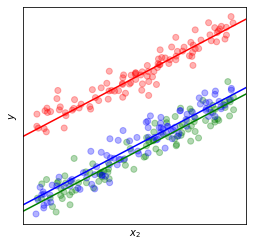

In [4]:
from my_functions.multiple_regression_analysis import ancova
ancova.show()

## 回帰係数の標本分布
---
回帰方程式 $y=a+bx+\epsilon$ の**誤差項 $\epsilon$ が正規分布に従うなら**、回帰係数の推定量 $\hat{b}$ も正規分布に従う。

より正確には、誤差項 $\epsilon_1,\ \epsilon_2,\dots,\ \epsilon_n$ が独立で共通の正規分布 $N(0, \sigma^2)$ に従うとすると、回帰係数の推定量 $\hat{b}$ は $
N\left(b,\ {\displaystyle \frac
    {\sigma ^{2}}
    {\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}}
} \right)
$ に従う。

###### 証明

誤差項 $\epsilon_1,\ \epsilon_2,\dots,\ \epsilon_n$ が独立で共通の正規分布 $N(0,\ \sigma^2)$ に従うと仮定する。

$
\begin{align}
    \hat{b} & =\frac
        {Cov( x,y)}
        {V( x)}\\
    \\
     & =\frac
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)\left( y_{i} -\overline{y}\right)} }
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} }
     \\
     \\
     & =\frac
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)\left( a+bx_{i} +\epsilon _{i} -\frac
             {1}
             {n}
         \sum ^{n}_{i=1}( a+bx_{i} +\epsilon _{i})\right)} }
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} }
     \\
     \\
     & =\frac
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)\left( a+bx_{i} +\epsilon _{i} -a-b\overline{x} -\frac
             {1}
             {n}
         \sum ^{n}_{i=1} \epsilon _{i}\right)} }
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} }
     \\
     \\
     & =\frac
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)\left( b\left( x_{i} -\overline{x}\right) +\epsilon _{i} -\frac
             {1}
             {n}
         \sum ^{n}_{i=1} \epsilon _{i}\right)} }
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} }
     \\
     \\
     & =b+\frac
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right) \epsilon _{i}} }
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} }
     -\frac
         {{\displaystyle \sum ^{n}_{i=1}\left\{\left( x_{i} -\overline{x}\right)\sum ^{n}_{i=1} \epsilon _{i}\right\}} }
         {{\displaystyle n\sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} }
\end{align}
$

より、平均は

$
\begin{align}
    E\left(\hat{b}\right) & =E\left( b+\frac
        {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right) \epsilon _{i}} }
        {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} }
    -\frac
        {{\displaystyle \sum ^{n}_{i=1}\left\{\left( x_{i} -\overline{x}\right)\sum ^{n}_{i=1} \epsilon _{i}\right\}} }
        {{\displaystyle n\sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} }\right)
    \\
    \\
     & =b+\frac
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right) E( \epsilon _{i})} }
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} }
     -\frac
         {{\displaystyle \sum ^{n}_{i=1}\left\{\left( x_{i} -\overline{x}\right)\sum ^{n}_{i=1} E( \epsilon _{i})\right\}} }
         {{\displaystyle n\sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} }
     \\
     \\
     & =b\ \because E( \epsilon _{i}) =0
\end{align}
$

分散は

$
\begin{align}
    V\left(\hat{b}\right) & =E\left(\left(\hat{b} -E\left(\hat{b}\right)\right)^{2}\right)\\
     \\
     & =E\left(\left(\hat{b} -b\right)^{2}\right)\\
     \\
     & =E\left(\left(\frac
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right) \epsilon _{i}} }
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} }
     -\frac
         {{\displaystyle \sum ^{n}_{i=1}\left\{\left( x_{i} -\overline{x}\right)\sum ^{n}_{i=1} \epsilon _{i}\right\}} }
         {{\displaystyle n\sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} }\right)^{2}\right)
     \\
     \\
     & =E\left(\left(\frac
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right) \epsilon _{i}} }
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} }
     \right)^{2} -2\frac
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right) \epsilon _{i}} }
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} }
     \cdot \frac
         {{\displaystyle \sum ^{n}_{i=1}\left\{\left( x_{i} -\overline{x}\right)\sum ^{n}_{i=1} \epsilon _{i}\right\}} }
         {{\displaystyle n\sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} }
     +\left(\frac
         {{\displaystyle \sum ^{n}_{i=1}\left\{\left( x_{i} -\overline{x}\right)\sum ^{n}_{i=1} \epsilon _{i}\right\}} }
         {{\displaystyle n\sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} }
     \right)^{2}\right)\\
     \\
     & =E\left(\left(\frac
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right) \epsilon _{i}} }
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} }
     \right)^{2}\right) \ \because E\left(\sum ^{n}_{i=1} \epsilon _{i}\right) =0\\
     \\
     & =E\left(\frac
         {{\displaystyle \sum ^{n}_{i=1}\sum ^{n}_{j=1}\left( x_{i} -\overline{x}\right)\left( x_{j} -\overline{x}\right) \epsilon _{i} \epsilon _{j}} }
         {\left({\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} \right)^{2}}\right)
\end{align}
$

ここで、 $i\neq j$ のとき $Cov( \epsilon _{i} ,\ \epsilon _{j}) =E(( \epsilon _{i} -E( \epsilon _{i}))( \epsilon _{j} -E( \epsilon _{j}))) =E( \epsilon _{i} \epsilon _{j})$ かつ $\epsilon _{1},\ \epsilon _{2},\dots ,\ \epsilon _{n}$ は独立なので $Cov( \epsilon _{i} ,\ \epsilon _{j}) =0$

$V( \epsilon _{i}) =E\left( \epsilon ^{2}_{i}\right) -E( \epsilon _{i})^{2} =E\left( \epsilon ^{2}_{i}\right)$ かつ $\epsilon _{i}$ は $N(0,\ \sigma^2)$ に従うので、 $V( \epsilon _{i}) =\sigma^2$

したがって

$
\begin{align}
    V\left(\hat{b}\right) & =E\left(\frac
        {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2} \epsilon ^{2}_{i}} }
        {\left({\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} \right)^{2}}\right)
    \\
     \\
     & =E\left(\frac
         {{\displaystyle \sum ^{n}_{i=1} \epsilon ^{2}_{i}} }
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} }\right)
     \\
     \\
     & =\frac
         {\sigma ^{2}}
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} }
\end{align}
$

さらに $
\hat{b} =b+\frac
    {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right) \epsilon _{i}} }
    {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} }
-\frac
    {{\displaystyle \sum ^{n}_{i=1}\left\{\left( x_{i} -\overline{x}\right)\sum ^{n}_{i=1} \epsilon _{i}\right\}} }
    {{\displaystyle n\sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} }
$ より、 $\hat{b}$ は正規分布に従う $\epsilon _{i}$ の線形関数なので、 $\hat{b}$ も正規分布に従う。

以上より、回帰係数 $\hat{b}$ の標本分布は $
N\left(b,\ \frac
    {{\displaystyle \sigma ^{2}}}
    {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}} }
\right)$ に従う。

## 区間推定
---
標本分布が正規分布なので、正規分布の区間推定と同様に $t$ 分布を利用する。

単回帰分析の信頼区間の表示は`seaborn.regplot`で可能。具体的な $x$ の値に対応した上限・下限は自分で計算しないといけない。  
予測区間は`statsmodels.sandbox.regression.predstd.wls_prediction_std`を使用する。  
基本的には R のパッケージ (lm など) を使うほうが簡単。

パッケージを使う場合は信頼区間 (confidence interval) と予測区間 (prediction interval) の違いに気をつける。

<table class="border">
    <tr class="text-center background-dark">
        <th class="border-right-bold" style="min-width: 5.5em;"></th>
        <th>概要</th>
        <th>回帰分析での例</th>
    </tr>
    <tr class="text-left background-bright">
        <th class="text-center background-dark border-right-bold border-bottom">信頼区間</th>
        <td>標本抽出を繰り返して母数 (母平均や母回帰係数など) を推定すると一定割合 (95%など) の予測値が収まると考えられる区間</td>
        <td>回帰係数 $a,\ b$ の推定量 $\hat{a},\ \hat{b}$ の推定区間</td>
    </tr>
    <tr class="text-left background-bright">
        <th class="text-center background-dark border-right-bold border-bottom">予測区間</th>
        <td>標本抽出を繰り返すと一定割合 (95%など) の標本が入ると考えられる区間</td>
        <td>$\epsilon$ の分散 $\sigma ^2$ の推定量 $s^2$ の推定区間</td>
    </tr>
</table>

In [5]:
from my_functions.multiple_regression_analysis import interval
interval.show()

interactive(children=(FloatSlider(value=0.05, continuous_update=False, description='信頼区間の係数', max=0.5, min=0.0…

区間予測の精度が高ければ、結果を利用して価格変動に対する保険商品を設計することも考えられる。 ([参考](https://jp.techcrunch.com/2006/11/14/farecast-selling-airline-ticket-price-guarantees/))

## 回帰係数の検定
---
回帰係数の検定は、主に独立変数が従属変数を説明できているか (回帰方程式の傾きが 0 でないか) を確かめるために利用される。

回帰係数 $b$ の推定量 $\hat{b}$ についての検定は、誤差項 $\epsilon$ の標準誤差 $
s ={\displaystyle \sqrt{
    \frac
        {{\displaystyle
            \sum ^{n}_{i=1} e^{2}_{i}
        } }
        {n-2}
}}
$ とおくと、次の統計量 $t$ が自由度 $n-2$ の $t$ 分布 $t(n-2)$ に従うことを利用する。 (単回帰の場合)

$
t={\displaystyle
    \frac
        {\hat{b} -b_{0}}
        {\displaystyle \sqrt{
            \frac
                {s^{2}}
                {\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}}
        }}
}
$

回帰方程式の傾きが 0 でないかを確かめるので、 $b_{0} =0$ が帰無仮説。

###### 証明

誤差項 $\epsilon$ の分散 $\sigma^2$ の不偏推定量は $
s^2=\displaystyle \frac
    {\displaystyle \sum_{i=1}^{n}e^{2}_{i}}
    {n-2}
$ 。 (証明は省略)

$\hat{b}$ を標準化した $
Z=\displaystyle \frac
    {\hat{b} -\overline{b}}
    {\displaystyle \sqrt{
        \frac
            {\sigma ^{2}}
            {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}}}
    }}
$ の $\sigma^{2}$ が未知なので、 $s^{2}$ で置き換えた統計量 $t$ は

$
\begin{align}
    t & ={\displaystyle \frac
        {\hat{b} -\overline{b}}
        {\displaystyle \sqrt{
            \frac
                {s^{2}}
                {\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}}
        }}
    } \\
     \\
     & =\frac
         {\displaystyle \frac
             {\hat{b} -\overline{b}}
             {\sqrt{
                 \displaystyle \frac
                     {\sigma ^{2}}
                     {\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}}
             }}
         }
         {\frac
             {\displaystyle \sqrt{
                 \frac
                     {s^{2}}
                     {\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}}
             }}
             {\sqrt{
                 \displaystyle \frac
                     {\sigma ^{2}}
                     {\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}}
             }}
         }
     \\
     \\
     & =\frac
         {Z}
         {\displaystyle \sqrt{
             \frac
                 {\sigma ^{2}}
                 {s^{2}}
         }}
     \\
     \\
     & =\frac
         {Z}
         {\displaystyle \sqrt{
             \frac
                 {1}
                 {n-2}
             \frac
                 {( n-2) \sigma ^{2}}
                 {s^{2}}
         }}
     \\
     \\
     & =\frac
         {Z}
         {\displaystyle \sqrt{
             \frac
                 {1}
                 {n-2}
         \chi ^{2}}}
\end{align}
$

より、自由度 $n-2$ の $t$ 分布に従う。

これを利用して回帰係数 $b$ の推定量 $\hat{b}$ について $t$ 検定を行う。

### Pythonでの検定の実行方法
---
`statsmodels.regression.linear_model.OLS`を用いる。`summary`にあるそれぞれの変数の P>|t| が $t$ 検定の $p$ 値。 $F$ 統計量 (F-statistic) は全ての係数が 0 であるかどうかの検定統計量。  
標準では切片項が入らないので、`statsmodels.tools.tools.add_constant`で追加する。

In [6]:
sm.OLS??

In [7]:
boston = pd.read_csv('data/boston.csv')
print('boston')
display(boston)

boston


,犯罪率,住宅地割合,非小売業種割合,河川への隣接,...,生徒と教師の比率,黒人比率,低所得層割合,中央価格
0,0.00632,18.0,2.31,0,...,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,...,17.8,396.90,9.14,21.6
...,...,...,...,...,...,...,...,...,...
504,0.10959,0.0,11.93,0,...,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,...,21.0,396.90,7.88,11.9


In [8]:
x = sm.add_constant(boston.iloc[:, :-1])
y = boston.iloc[:, -1]
model = sm.OLS(y, x)
fit = model.fit()
fit.summary()

/root/local/python-3.7.4/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   中央価格   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 16 May 2020   Prob (F-statistic):          6.72e-135
Time:                        09:26:06   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          36.4595      5.103      7.144      0.000      26.432      46.487
犯罪率            -0.1080      0.033     -3.287      0.001      -0.173      -0.043
住宅地割合           0.0464      0.014      3.382      0.001       0.019       0.073
非小売業種割合         0.0206      0.061      0.334      0.738      -0.100       0.141
河川への隣接          2.6867      0.862      3.118      0.002       0.994       4.380
窒素酸化物濃度       -17.7666      3.820     -4.651      0.000     -25.272     -10.262
平均部屋数           3.8099      0.418      9.116      0.000       2.989       4.631
古い持ち家割合         0.0007      0.013      0.052      0.958      -0.025       0.027
雇用センターまでの距離    -1.4756      0.199     -7.398      0.000      -1.867      -1.084
高速道路へのアクセス      0.3060      0.066      4.613      0.000       0.176       0.436
固定資産税率         -0.0123      0.004     -3.280      0.001      -0.020      -0.005
生徒と教師の比率       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
黒人比率            0.0093      0.003      3.467      0.001       0.004       0.015
低所得層割合         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###### 練習問題

`diamonds`データセットに対して、`price(log)`を目的変数・`carat(log)`と`color`を説明変数として共分散分析を実行し、`color`の違いによって`price(log)`に有意水準 $5\%$ で差があると言えるかどうか検定する。

In [9]:
diamonds = sns.load_dataset('diamonds')
diamonds = diamonds.query('color in ["D", "J"]')
diamonds = diamonds.sample(500, random_state=1234)
diamonds['carat(log)'] = np.log(diamonds['carat'])
diamonds['price(log)'] = np.log(diamonds['price'])
print('diamonds')
display(diamonds)

diamonds


,carat,cut,color,clarity,...,y,z,carat(log),price(log)
35459,0.43,Premium,D,VS2,...,4.93,2.93,-0.843970,6.803505
4433,0.73,Ideal,D,SI1,...,5.83,3.57,-0.314711,8.192847
...,...,...,...,...,...,...,...,...,...
22555,1.35,Ideal,D,VS2,...,7.13,4.36,0.300105,9.268798
3295,0.74,Premium,D,VS1,...,5.77,3.63,-0.301105,8.121183


In [10]:
model = sm.GLM(
    diamonds['price(log)'],
    sm.add_constant(
        pd.concat([
            diamonds['carat(log)'],
            pd.get_dummies(diamonds['color'], drop_first=True)
        ],
                  axis='columns'))).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             price(log)   No. Observations:                  500
Model:                            GLM   Df Residuals:                      497
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                        0.058850
Method:                          IRLS   Log-Likelihood:                0.22485
Date:                Sat, 16 May 2020   Deviance:                       29.249
Time:                        09:26:07   Pearson chi2:                     29.2
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5827      0.017    503.893      0.000       8.549       8.616
carat(log)     1.7681      0.020     89.372      0.000       1.729       1.807
J             -0.4572      0.025    -18.090      0.000      -0.507      -0.408
==============================================================================
"""

`color(J)`の $p< 0.05$ より、差があると言える。

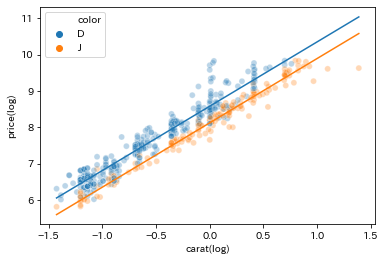

In [11]:
sns.scatterplot('carat(log)', 'price(log)', 'color', data=diamonds, alpha=0.3)
carat = diamonds['carat(log)']
x_range = np.array([carat.min(), carat.max()])
slope = model.params['carat(log)']

for i in range(2):
    intercept = model.params['const'] + model.params['J'] * i
    plt.plot(x_range, slope * x_range + intercept)
plt.show()

## 推薦図書
---
[心理統計学の基礎―統合的理解のために](https://www.amazon.co.jp/%E5%BF%83%E7%90%86%E7%B5%B1%E8%A8%88%E5%AD%A6%E3%81%AE%E5%9F%BA%E7%A4%8E%E2%80%95%E7%B5%B1%E5%90%88%E7%9A%84%E7%90%86%E8%A7%A3%E3%81%AE%E3%81%9F%E3%82%81%E3%81%AB-%E6%9C%89%E6%96%90%E9%96%A3%E3%82%A2%E3%83%AB%E3%83%9E-%E5%8D%97%E9%A2%A8%E5%8E%9F-%E6%9C%9D%E5%92%8C/dp/4641121605/)